## Categorical Perception: A Groundwork for Deep Learning
#### Laurent Bonnasse-Gahot & Jean-Pierre Nadal
Python notebook for reproducing D.1 (Classification accuracy on the CIFAR-10 image dataset (test set) using a multi-layer perceptron with varying levels of dropout.).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rc={'font.size': 11, 'axes.labelsize': 14, 
    'xtick.labelsize': 12, 'ytick.labelsize': 12}
sns.set(rc=rc)
sns.set_style('ticks')

In [3]:
from matplotlib.patches import ArrowStyle

In [4]:
if not os.path.exists('fig'):
    os.makedirs('fig')

In [5]:
seeds = np.arange(1, 11)

In [6]:
df_raw_results = []
for seed in seeds:
    filename = 'csv/cifar10_mlp_dropout_seed_{}.csv'.format(seed)
    df_raw_results_seed = pd.read_csv(filename)
    df_raw_results_seed['trial'] = seed
    df_raw_results.append(df_raw_results_seed)
df_raw_results = pd.concat(df_raw_results)

In [7]:
n_layers = np.unique(df_raw_results.layer).size
n_trials = np.unique(df_raw_results.trial).size
dropout_range = np.unique(df_raw_results.dropout)

In [8]:
df_results = []
for trial in range(1,1+n_trials):
    for layer in range(n_layers):
        for dropout in dropout_range:
            val_accuracy = np.mean(np.sort(df_raw_results[(df_raw_results.trial==trial)
                                                          &(df_raw_results.layer==layer)
                                                          &(df_raw_results.dropout==dropout)]['val_accuracy'])[-10:])            
            df_results.append(pd.DataFrame({'trial': [trial],
                                   'layer': [layer],
                                   'dropout': [dropout],
                                   'val_accuracy': [val_accuracy]}))

df_results = pd.concat(df_results, ignore_index=True)

In [9]:
best_dropout = []
for layer in range(n_layers):
    best_dropout.append(df_results[df_results.layer==layer].groupby('dropout')['val_accuracy'].mean().idxmax())

In [10]:
color_layer = sns.cubehelix_palette(n_colors=n_layers, start=0.3, rot=0.3,
                                    light=0.75, dark=0.2, hue=0.8 , gamma=0.9)

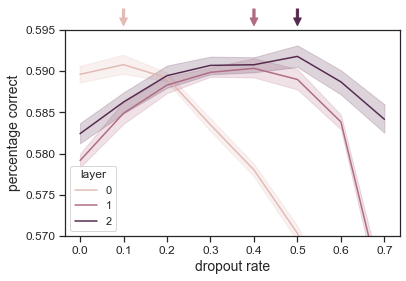

In [11]:
fh = plt.figure(figsize=(6,3.8))
ax = plt.subplot(111)
sns.lineplot(x='dropout', y='val_accuracy', hue='layer', palette=color_layer,
             data=df_results, ax=ax)

plt.ylim((0.570, 0.595))

ylim = plt.ylim()
for layer in range(n_layers):
    ax.annotate('', 
                xy=(best_dropout[layer], ylim[1]+0.01*(ylim[1]-ylim[0])), 
                xytext=(best_dropout[layer], ylim[1]+0.11*(ylim[1]-ylim[0])),
                arrowprops=dict(arrowstyle=ArrowStyle('simple',head_length=0.7,head_width=0.7),
                                edgecolor=color_layer[layer],
                                facecolor=color_layer[layer]),
                annotation_clip=False) 
plt.xlabel('dropout rate')
plt.ylabel('percentage correct')
plt.show()

fh.savefig('fig/cifar10_dropout_depth.pdf',
           bbox_inches='tight')